In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from numpy.random import default_rng
import pandas as pd

In [3]:
def ssq(arrivals, service_times):
  arrivals = [0.0] + arrivals
  service_times = [0.0] + service_times
  completion_times = [0.0]*len(service_times)
  delays = [0.0]
  for i in range(1, len(service_times)):
    if arrivals[i] < completion_times[i-1]:
      delays.append(completion_times[i-1] - arrivals[i])
    else:
      delays.append(0.0)
    completion_times[i] = arrivals[i] + delays[i] + service_times[i]
  
  return delays[1:], completion_times[1:]

In [4]:
rng = np.random.default_rng()
arrivals = rng.exponential(scale=30, size=1000).tolist()
arrivals = [5]
service_times = [8]
delays, completion_times = ssq(arrivals, service_times)

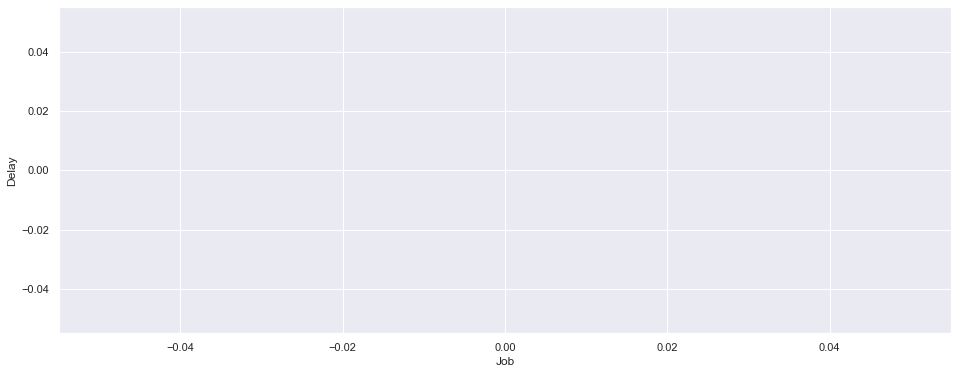

In [5]:
def plot_delay_times(arrivals, service_times, delays):
  df = pd.DataFrame(data={'Job':range(len(arrivals)),
                          'Arrival Time':arrivals,
                          'Service Time': service_times,
                          'Delay': delays})
  plt.figure(figsize=(16, 6))
  ax = sns.lineplot(data=df, x="Job", y="Delay")

plot_delay_times(arrivals, service_times, delays)

In [6]:
def compute_job_avg_statistics(arrivals, service_times):
    
    Unidad_prome_sist = (np.mean(arrivals))/((np.mean(service_times))-(np.mean(arrivals)))
    Prom_time = 1/((np.mean(service_times))-(np.mean(arrivals)))
    num_prom = ((np.mean(arrivals)**2))/(np.mean(service_times)) * ((np.mean(service_times))-(np.mean(arrivals)))
    Tiempo_fila = (np.mean(arrivals))/(np.mean(service_times)) * ((np.mean(service_times))-(np.mean(arrivals)))
    fac_sistema_ser = (np.mean(arrivals)) / (np.mean(service_times))
    prob_no_sistem = 1 - (np.mean(arrivals))/(np.mean(service_times))
    prob_unidad_n_sist = prob_no_sistem * ((fac_sistema_ser)**(len(arrivals)))
    
    return [Unidad_prome_sist,
          Prom_time,
          num_prom,
          Tiempo_fila,
          fac_sistema_ser,
          prob_no_sistem,
          prob_unidad_n_sist]

job_avg_statistics = compute_job_avg_statistics(arrivals, service_times)
                                             
print(f'Promedio de unidad de tiempo en el sistema: {job_avg_statistics[0]}')
print(f'Tiempo promedio en unidad dentro del sistema: {job_avg_statistics[1]}')
print(f'Promedio unidad por fila de espera: {job_avg_statistics[2]}')
print(f'Promedio unidad pasa por fila de espera: {job_avg_statistics[3]}')
print(f'Factor del uso de sistema: {job_avg_statistics[4]}')
print(f'Probabilidad de que ninguna unidad este en sistema : {job_avg_statistics[5]}')
print(f'Probabilidad de que el sistema tenga exactamente “n” unidades : {job_avg_statistics[6]}')

Promedio de unidad de tiempo en el sistema: 1.6666666666666667
Tiempo promedio en unidad dentro del sistema: 0.3333333333333333
Promedio unidad por fila de espera: 9.375
Promedio unidad pasa por fila de espera: 1.875
Factor del uso de sistema: 0.625
Probabilidad de que ninguna unidad este en sistema : 0.375
Probabilidad de que el sistema tenga exactamente “n” unidades : 0.234375
